<a href="https://colab.research.google.com/github/LaurensEiroa/DeepESN/blob/master/DeepESN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/Reservoir Computing/')
from Leaky_ESN import ESN
from My_Series import create_narmaX_data

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt

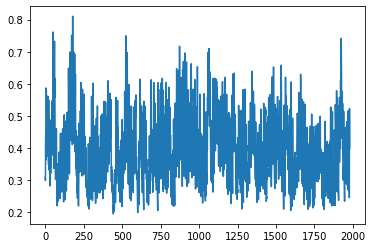

In [3]:
u,y=create_narmaX_data(2000)
u=u.repeat(1,axis=0)
y=y.repeat(1,axis=0)
plt.plot(range(y.shape[1]),y[0])
plt.show()

In [0]:
# Reservoir in serie
res1 = ESN(_input_nodes=1,_reservoir_nodes=150,_output_nodes=1)
res2 = ESN(_input_nodes=150+1,_reservoir_nodes=150,_output_nodes=1)
res3 = ESN(_input_nodes=150+1,_reservoir_nodes=150,_output_nodes=1)
res4 = ESN(_input_nodes=150+1,_reservoir_nodes=150,_output_nodes=1)
res5 = ESN(_input_nodes=150+1,_reservoir_nodes=150,_output_nodes=1)
state1 = res1.reservoir_state(u,bias=True)
state2 = res2.reservoir_state(state1,bias=True)
state3 = res3.reservoir_state(state2,bias=True)
state4 = res4.reservoir_state(state3,bias=True)
state5 = res5.reservoir_state(state4,bias=True)

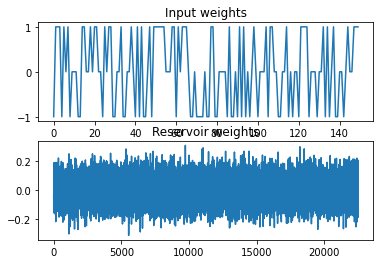

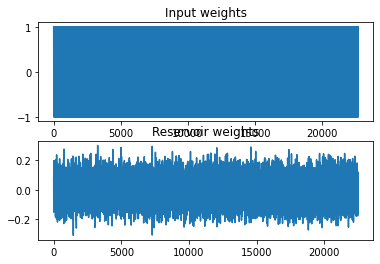

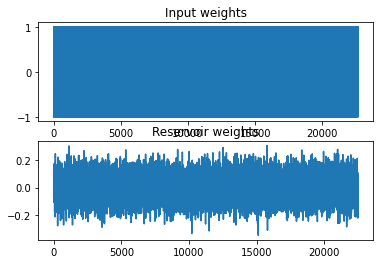

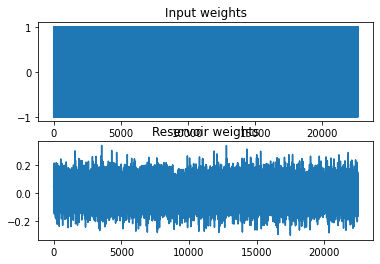

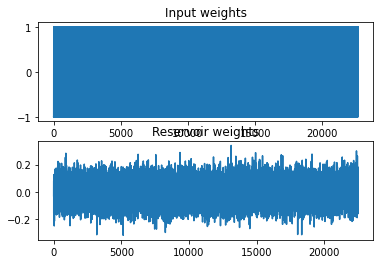

In [5]:
reservoirs = [res1,res2,res3,res4,res5]
for res in reservoirs:
  res.weights_visualization()

In [6]:
res5.fit(state5,y)

Convergence after  14  iterations


In [0]:
y_pred = res5.predict(state5)

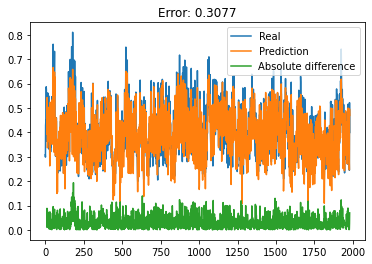

In [8]:
plt.plot(range(y.shape[1]),y[0],label='Real')
plt.plot(range(10,y.shape[1]),y_pred[0,10:],label='Prediction')
plt.plot(range(10,y.shape[1]),np.abs(y[0,10:]-y_pred[0,10:]),label='Absolute difference')
plt.title('Error: {}'.format(round(res5.nrmse(y[0,50:],y_pred[0,50:]),4)))
plt.legend()
plt.show()

In [0]:
# DeepESN in parallel
res1 = ESN(_input_nodes=1,_reservoir_nodes=150,_output_nodes=1,_k_percentage_optimal=0.5)
res2 = ESN(_input_nodes=1,_reservoir_nodes=150,_output_nodes=1,_k_percentage_optimal=0.6)
res3 = ESN(_input_nodes=1,_reservoir_nodes=150,_output_nodes=1,_k_percentage_optimal=0.7)
res4 = ESN(_input_nodes=1,_reservoir_nodes=150,_output_nodes=1,_k_percentage_optimal=0.8)
res5 = ESN(_input_nodes=1,_reservoir_nodes=150,_output_nodes=1,_k_percentage_optimal=0.9)
outputRes = ESN(_input_nodes=1, _reservoir_nodes=5*151,_output_nodes=1)
state1 = res1.reservoir_state(u,bias=True)
state2 = res2.reservoir_state(u,bias=True)
state3 = res3.reservoir_state(u,bias=True)
state4 = res4.reservoir_state(u,bias=True)
state5 = res5.reservoir_state(u,bias=True)

In [0]:
state = np.concatenate((state1,state2,state3,state4,state5),axis=0)
outputRes.fit(state,y)
y_pred = outputRes.predict(state)

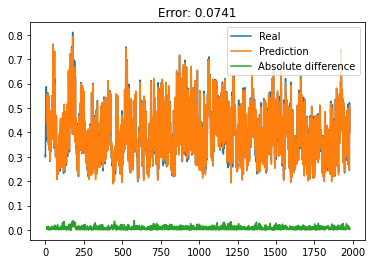

In [17]:
plt.plot(range(y.shape[1]),y[0],label='Real')
plt.plot(range(10,y.shape[1]),y_pred[0,10:],label='Prediction')
plt.plot(range(10,y.shape[1]),np.abs(y[0,10:]-y_pred[0,10:]),label='Absolute difference')
plt.title('Error: {}'.format(round(res5.nrmse(y[0,50:],y_pred[0,50:]),4)))
plt.legend()
plt.show()